# Analise da série historica do BTC
23/03/2025

In [11]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [12]:
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

Baixando os dados do BTC

In [13]:
btc = yf.Ticker('BTC-USD')
df = btc.history(period='3y')

display(df.head(10))
display(df.info())
display(df.columns)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-23 00:00:00+00:00,42364.38,42893.51,41877.51,42892.96,25242943069,0.00,0.00
2022-03-24 00:00:00+00:00,42886.65,44131.86,42726.16,43960.93,31042992291,0.00,0.00
2022-03-25 00:00:00+00:00,43964.55,44999.49,43706.29,44348.73,30574413034,0.00,0.00
2022-03-26 00:00:00+00:00,44349.86,44736.00,44166.27,44500.83,16950455995,0.00,0.00
2022-03-27 00:00:00+00:00,44505.36,46827.55,44437.29,46820.49,28160889722,0.00,0.00
2022-03-28 00:00:00+00:00,46821.85,48086.84,46690.20,47128.00,36362175703,0.00,0.00
2022-03-29 00:00:00+00:00,47100.44,48022.29,47100.44,47465.73,31397059069,0.00,0.00
2022-03-30 00:00:00+00:00,47456.90,47655.15,46746.21,47062.66,29333883962,0.00,0.00
2022-03-31 00:00:00+00:00,47062.15,47512.03,45390.54,45538.68,33327427106,0.00,0.00


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1097 entries, 2022-03-23 00:00:00+00:00 to 2025-03-23 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1097 non-null   float64
 1   High          1097 non-null   float64
 2   Low           1097 non-null   float64
 3   Close         1097 non-null   float64
 4   Volume        1097 non-null   int64  
 5   Dividends     1097 non-null   float64
 6   Stock Splits  1097 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 68.6 KB


None

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

Tratamento

In [14]:
df.drop('Dividends', axis=1, inplace=True)
df.drop('Stock Splits', axis=1, inplace=True)
df.columns = ['Abertura','Maximo','Minimo','Fechamento','Volume']
df.head()

,Abertura,Maximo,Minimo,Fechamento,Volume
Date,,,,,
2022-03-23 00:00:00+00:00,42364.38,42893.51,41877.51,42892.96,25242943069
2022-03-24 00:00:00+00:00,42886.65,44131.86,42726.16,43960.93,31042992291
2022-03-25 00:00:00+00:00,43964.55,44999.49,43706.29,44348.73,30574413034
2022-03-26 00:00:00+00:00,44349.86,44736.00,44166.27,44500.83,16950455995
2022-03-27 00:00:00+00:00,44505.36,46827.55,44437.29,46820.49,28160889722


Variação percentual do BTC

In [15]:
btc_pct = df['Fechamento'].pct_change()

Variação de 2025

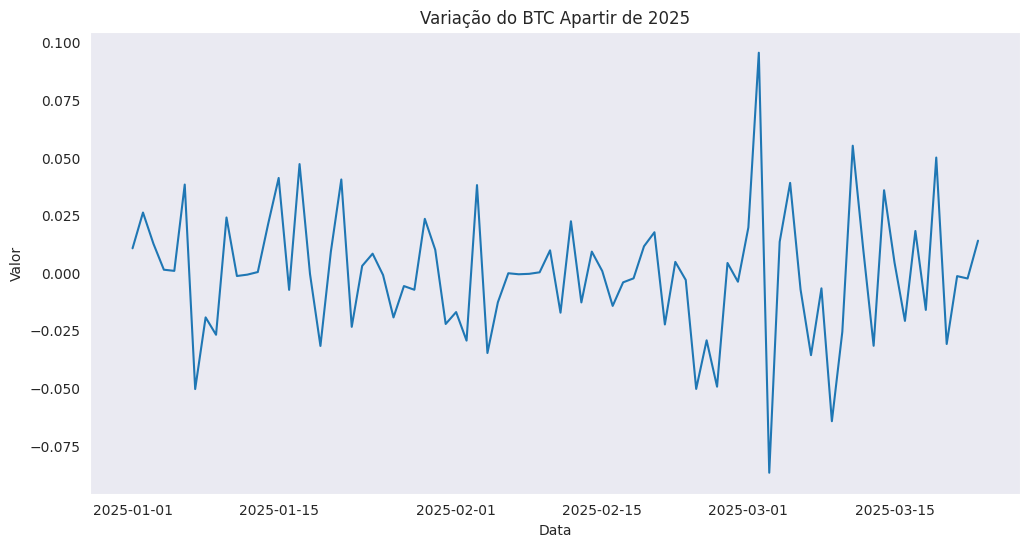

In [16]:
sns.set_style('dark')
plt.figure(figsize=(12,6))
sns.lineplot(btc_pct['2025'])
plt.title('Variação do BTC Apartir de 2025')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show();

Valor de fechamento diario

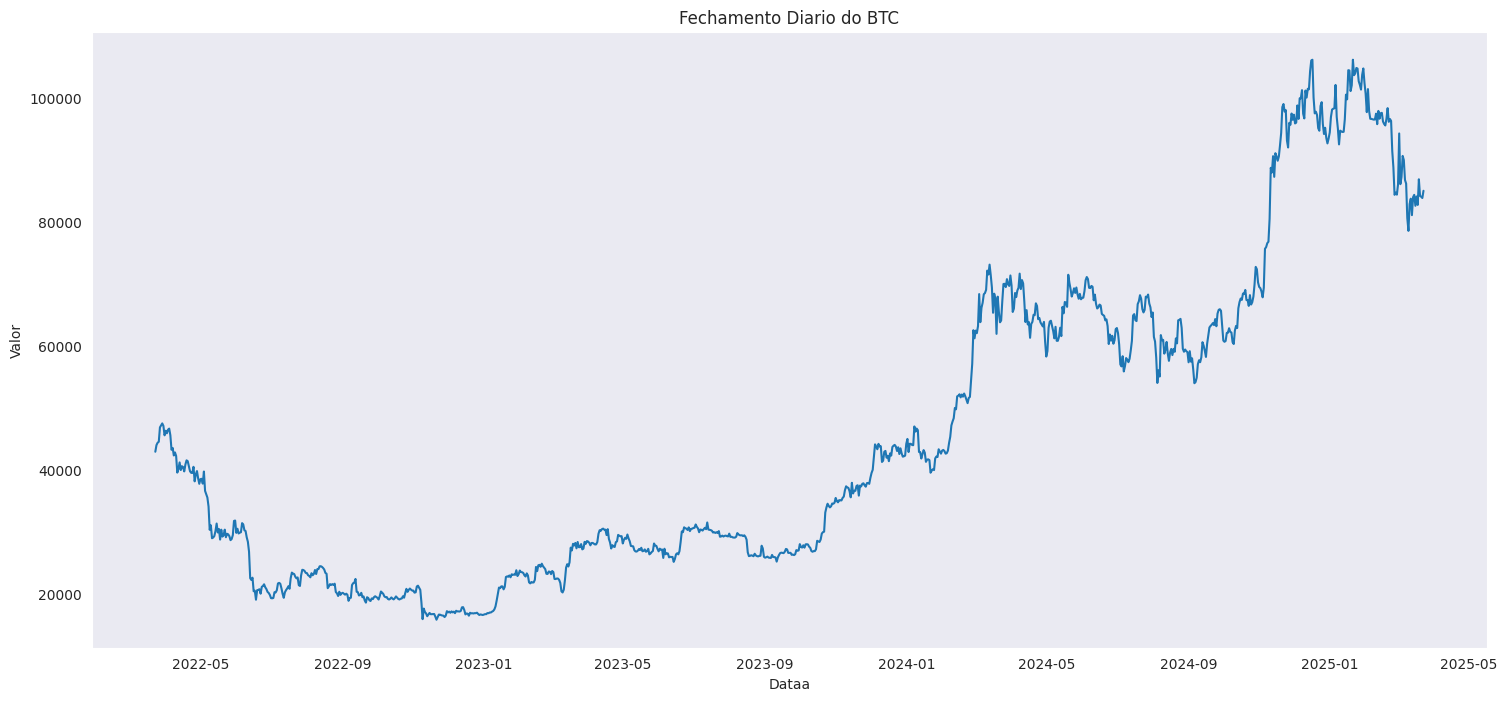

In [17]:
plt.figure(figsize=(18,8))
plt.plot(df["Fechamento"])
plt.title('Fechamento Diario do BTC')
plt.xlabel('Dataa')
plt.ylabel('Valor')
plt.show()

In [18]:

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['Fechamento'], mode='lines', name='Fechamento'))

fig.update_layout(
    title='Preço Diário de Fechamento do BTC',
    xaxis_title='Data',
    yaxis_title='Preço de Fechamento',
    template='plotly_white',
    title_font=dict(size=18),
    xaxis=dict(rangeslider=dict(visible=True)) )

fig.show()


Média movel de 90 dias

In [19]:
btc_media_movel = df['Media Movel']= df['Fechamento'].rolling(window=90).mean()

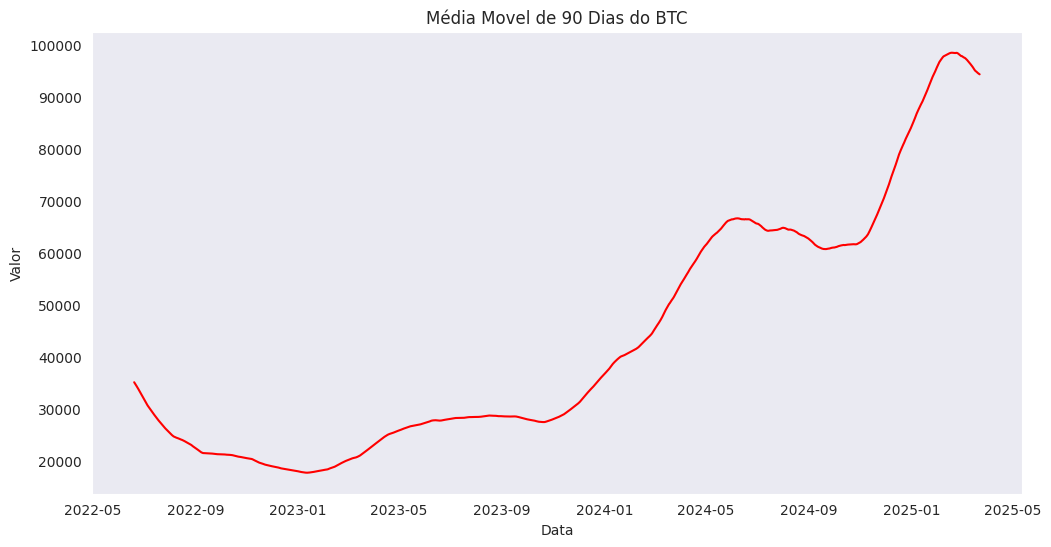

In [20]:
plt.figure(figsize=(12,6))
plt.plot(btc_media_movel, color='red')
plt.title('Média Movel de 90 Dias do BTC')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show();